In [43]:
!pip install Unidecode
!pip install autocorrect
!pip install wordcloud
!pip install spacy

ERROR: unknown command "upgrade"

ERROR: unknown command "upgrade"



# Importing Important libraries


In [2]:
# to read and manipuate data
import pandas as pd
pd.set_option('max_colwidth', None)

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

#Helps to dispay the images
import PIL as Image

# To extract data using regular expression
import re

# Helps to remove the punctuation
import string

#Helps to remove the accented characters
import unidecode

# It helps to correct the spellings
from autocorrect import Speller

# Importing the nltk library
import nltk

nltk.download('stopwords')    # Loading the stopwords
nltk.download('punkt')        # Loading the punkt module, used in Tokenization
nltk.download('omw-1.4')      # Dependency for Tokenization
nltk.download('wordnet')      # Loading the wordnet module, used in stemming and lemmatization

from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Using in stemming

from nltk.stem.porter import PorterStemmer

from nltk.stem import SnowballStemmer

from nltk.stem import LancasterStemmer

# Used in lemmatization

from nltk.stem import WordNetLemmatizer
import spacy

from spacy.lang.en import English
en_nlp = English()

# Used in Tokenization

from nltk.tokenize import word_tokenize, sent_tokenize

# Importing the spacy library

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score,classification_report

[nltk_data] Downloading package stopwords to C:\Users\Murali
[nltk_data]     Vj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Murali
[nltk_data]     Vj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Murali
[nltk_data]     Vj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Murali
[nltk_data]     Vj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading the dataset

Important - Please note that the code for importing the dataset will vary depending on the IDE used for coding. This code is for google colab - loading csv which is stored in google drive.

In [3]:
# Uploading dataset
messages = pd.read_csv('spam_detector.csv')



In [4]:
# creating a copy of dataset
data = messages.copy()

In [5]:
data.head()

,type,text
0,ham,Hope you are having a good week. Just checking in ñó ñó
1,ham,K..going bacckk to stävänger
2,ham,Am also dong in cbe ony. Bt have to pay
3,ham,Are you this much buzy
4,ham,Please ask mummy to call father


In [6]:
data.tail()

,type,text
5055,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country Liverpool played in mid week? Txt ansr to 82277. £1.50 SP:Tyrone
5056,spam,"""HOT LIVE FANTASIES call now 08707509020 Just 20p per min NTT Ltd PO Box 1327 Croydon CR9 5WB 0870 is a national rate call"""
5057,spam,Ur balance is now £500. Ur next question is: Who sang 'Uptown Girl' in the 80's ? 2 answer txt ur ANSWER to 83600. Good luck!
5058,spam,"""If you don't your prize will go to another customer. T&C at www.t-c.biz 18+ 150p/min Polo Ltd Suite 373 London W1J 6HL Please call back if busy """
5059,spam,"""SMS. ac JSco: Energy is high but u may not know where 2channel it. 2day ur leadership skills r strong. Psychic? Reply ANS w/question. End? Reply END JSCO"""


In [7]:
data.shape

(5060, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5060 entries, 0 to 5059
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5060 non-null   object
 1   text    5060 non-null   object
dtypes: object(2)
memory usage: 79.2+ KB


In [9]:
#Checking duplicate values
data.duplicated().sum()

389

In [10]:
# Removing duplicate values
data = data.drop_duplicates(keep = 'first')

data.duplicated().sum()

0

In [11]:
# Resetting the index of the dataframe
data = data.reset_index(drop = True)

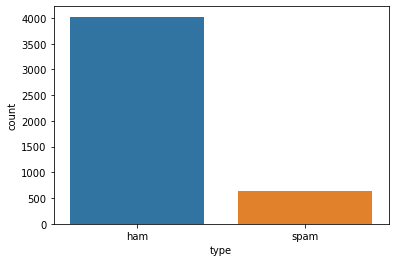

ham     0.861486
spam    0.138514
Name: type, dtype: float64


In [12]:
#lets look at the distribution o ham and spam
sns.countplot(x = 'type',data=data)
plt.show()


# Checking percentage of ham and spam
print(data['type'].value_counts(normalize=True))



In [13]:
data['text'][4320]

'URGENT! We are trying to contact U. Todays draw shows that you have won a £800 prize GUARANTEED. Call 09050001808 from land line. Claim M95. Valid12hrs only'

## Text Preprocessing Step 1
### Removing accented characters from the text
Accents are special string characters generally adapted from other languages. They are not considered a major part of English.
By using the unidecode library, we can transliterate any unicode string into the closest possible representation in ASCII text.

In [14]:
# Lets look at the first 2 texts
data['text'][0:2]

0    Hope you are having a good week. Just checking in ñó ñó
1                               K..going bacckk to stävänger
Name: text, dtype: object

In [15]:
text = []

for i in range(data.shape[0]):
    
    t = data['text'][i].split()
    # applying the unidecode data on a sentence and replace the accented word
    new_text = [unidecode.unidecode(word) for word in t]  
    
    # Combining the seperated values
    new_text = ' '.join(new_text)
    # append new text to the list
    text.append(new_text)

data['cleaned data']=text
 

In [16]:
data.loc[0:3,['text','cleaned data']]

,text,cleaned data
0,Hope you are having a good week. Just checking in ñó ñó,Hope you are having a good week. Just checking in no no
1,K..going bacckk to stävänger,K..going bacckk to stavanger
2,Am also dong in cbe ony. Bt have to pay,Am also dong in cbe ony. Bt have to pay
3,Are you this much buzy,Are you this much buzy


## Text Preprocessing Step 2
#### Removing special characters from the text
The function isalnum() method returns True if all the characters are alphanumeric, meaning alphabet letter (a-z) and numbers (0-9). By using this function we can retrive the data which consists of only letters and numbers.

In [17]:
data['text'][75]

'Yup bathe liao...'

In [18]:
example = data['text'][75].split()
example

['Yup', 'bathe', 'liao...']

In [19]:
text = []

for i in example:
    if i.isalnum():
        new_text = i
        text.append(new_text)

print('New list with only alphabets and numbers: ', text)

print('Original text: ',' '.join(text))

New list with only alphabets and numbers:  ['Yup', 'bathe']
Original text:  Yup bathe


In [20]:
text = []

for i in range(data.shape[0]):
    
    word = data['cleaned data'][i].split()
    new_text = ' '.join([element for element in word if element.isalnum()])
    text.append(new_text)

data['cleaned text'] = text
            
    


In [21]:
data.loc[[1,10,75,76,98,101],['text','cleaned text']]

,text,cleaned text
1,K..going bacckk to stävänger,bacckk to stavanger
10,K I'll be sure to get up before noon and see what's what,K be sure to get up before noon and see what
75,Yup bathe liao...,Yup bathe
76,I am getting threats from your sales executive Shifad as i raised complaint against him. Its an official message.,I am getting threats from your sales executive Shifad as i raised complaint against Its an official
98,No i'm not gonna be able to. || too late notice. || i'll be home in a few weeks anyway. || what are the plans,No not gonna be able too late be home in a few weeks what are the plans
101,Dont show yourself. How far. Put new pictures up on facebook.,Dont show How Put new pictures up on


#### There is an other way of deaing with special characters

In [22]:
import re

text = []

pattern = '[^A-Za-z0-9]+'


for i in range(data.shape[0]):
    
    words = data['cleaned data'][i].split()
    new_text = ''.join(re.sub(pattern, ' ',data['cleaned data'][i]))
    text.append(new_text)
data['cleaned data'] = text

    

In [23]:
data.loc[0:3,['text','cleaned data']]

,text,cleaned data
0,Hope you are having a good week. Just checking in ñó ñó,Hope you are having a good week Just checking in no no
1,K..going bacckk to stävänger,K going bacckk to stavanger
2,Am also dong in cbe ony. Bt have to pay,Am also dong in cbe ony Bt have to pay
3,Are you this much buzy,Are you this much buzy


## Text Preprocessing Step 3
### Lowercasing
Lowercasing is an important text preprocessing technique. The goal is to change the input text's case so that the words "text," "Text," and "TEXT" are all treated equally. Strings in Python are of course case-sensitive, so Python will not automatically do this for us.
Lowercasing helps reduce duplication and obtain accurate counts - it is hence an important part of various "feature extraction" approaches for text data.

In [37]:
# defining an empty list
text = []

# looping over each message in the data
for i in range(data.shape[0]):
    # lowecasing the text using the lower() function
    new_text = data['cleaned data'][i].lower()
    text.append(new_text)

data['cleaned data'] = text

In [38]:
data.loc[4320:4322,['text','cleaned data']]

,text,cleaned data
4320,URGENT! We are trying to contact U. Todays draw shows that you have won a £800 prize GUARANTEED. Call 09050001808 from land line. Claim M95. Valid12hrs only,we are trying to contact todays draw shows that you have won a ps800 prize call 09050001808 from land claim valid12hrs only
4321,Bloomberg -Message center +447797706009 Why wait? Apply for your future http://careers. bloomberg.com,bloomberg center why apply for your future
4322,WIN a £200 Shopping spree every WEEK Starting NOW. 2 play text STORE to 88039. SkilGme. TsCs08714740323 1Winawk! age16 £1.50perweeksub.,win a ps200 shopping spree every week starting 2 play text store to tscs08714740323 age16


## Text Preprocessing Step 4
#### Stripping Extra Spaces
Stripping helps remove spaces at the beginning and the end of the string/sentence.
The extra spaces in between the characters and the spaces at the start or end of the string do not add any value to the model, and will rather slow down its computation speed.
Thus, we can remove these extra spaces to make the model more efficient and targeted during the training process.

In [26]:
text = []

for i in range(data.shape[0]):
    
    new_text = data['cleaned text'][i].strip()
    text.append(new_text)
data['cleaned data'] = text

In [35]:
print("Before stripping the data : ",data['text'][6])
print("After stripping the data : ",data['cleaned data'][6])

Before stripping the data :  "       Sure thing big man. i have hockey elections at 6 shouldn€˜t go on longer than an hour though     "
After stripping the data :  Sure thing big i have hockey elections at 6 go on longer than an hour though


## Text Preprocessing Step 5
### Spellchecking

In [28]:
# Initializing the Spellchecker and setting the language to english

spell = Speller(lang = 'en')

#defining a function which will take input as text break
def autospell(text):
    
    word = text.split()
    spells = [spell(w) for w in word]
    return" ".join(spells)



In [33]:
text = []

for i in range(data.shape[0]):
    
    new_text = autospell(data['cleaned data'][i])
    text.append(new_text)
    
data['cleaned_data']= text

In [40]:
data.loc[0:2,['text','cleaned_data']]

,text,cleaned_data
0,Hope you are having a good week. Just checking in ñó ñó,Hope you are having a good Just checking in no no
1,K..going bacckk to stävänger,back to stranger
2,Am also dong in cbe ony. Bt have to pay,Am also dong in cbe Bt have to pay


## Text Preprocessing Step 6
### Stop word Removal
The simple idea with stop word removal is to exclude words that appear frequently throughout all the documents in the corpus. Pronouns and articles are typically categorized as stop words.

- To implement this, we have two Python libraries that are built to be used for NLP operations. Let's have a look at them and we'll implement them through both libraries.

- Before removing the stop words from the text however, let's have a look at the key words from the original data through visual representation.

### Word Cloud
- A word cloud (also known as a tag cloud or text cloud) is a visual representation of text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

Let's look at the top 100 unique words in original messages

In [41]:
all_texts = " ".join(texts for texts in data.text)
print ("There are {} words in the combination of all texts.".format(len(all_texts)))

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size = 40, max_words=100, background_color="white").generate(all_texts)
plt.figure(figsize=(8,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

There are 365343 words in the combination of all texts.


ValueError: Only supported for TrueType fonts